In [1]:
import urllib.request
import ssl

# Create an unverified SSL context that ignores certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

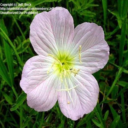

In [18]:
import numpy as np
import torch
import torchvision
from PIL import Image

## Create a vector of zeroes of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))
visualize_image(train_dataset[1][0])

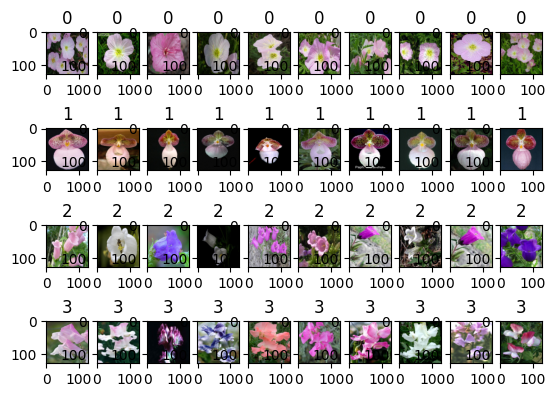

In [11]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10)
for i, (im, l) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(l)
    # ax[i // 10, i % 10].axis("off")
    
class_01 = list(train_dataset)[:20]

## Nearest Neighbors

$f:R \rightarrow \{0, 1\}$
- find closest x in data
- return corresponding y

takes a new test image X, goes through all images of class no 1 and then all images of class no 2, then it will figure out if class no 1 is closer or class no 2 is closer to the test image and assign the closer class no label.

In [16]:
def nn_classifier(x):
    dist = [((x - im).pow(2).sum().sqrt(), l) for im, l in class_01]
    return min(dist)[1]
    
nn_classifier(test_dataset[0][0])
accuracy = sum(nn_classifier(x) == y for x, y in list(test_dataset)[:20]) / 20

In [17]:
accuracy

0.4

In [20]:
[l for _, l in list(test_dataset)[:20]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## K - Nearest Neighbors

$f:R \rightarrow \{0, 1\}$
- Input x
- Find k closest data points n dataset D
- return most common label

Let us look at a simple classifier called k-nearest neighbor (kNN) classifier.

The idea is the following: given a new point, we predict it label based on the labels from a subset of $k$ training
sample that are *closest* to the new point.

Or put it in a more mathematical way:

We are given a training set $\mathcal{D}=\{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots, (\mathbf{x}_N, y_N)\}$
and a new data point $\mathbf{x}$.

The k-NN classifier is a function $f(\mathbf{x}): \mathbb{R} \rightarrow \{0, 1\} $ that does the following:

(1) it computes the distance of each training sampleto the new point
$\mathbf{x}$: $d_1=|\mathbf{x}_1 - \mathbf{x}|, \cdots, d_N=|\mathbf{x}_N - \mathbf{x}|$;

(2) it sorts $\{ d_1, \cdots, d_N \}$ in ascending order into $\{ d_{i_1}, \cdots, d_{i_k}, \cdots , d_{i_N} \}$,
where $ d_{i_1} < \cdots < d_{i_k} < \cdots < d_{i_N} $;

(3) it predicts the new point's label based on the *mode* of $\{ y_{i_1}, \cdots, y_{i_k} \}$.
(Mode refers to the value that appears most in the set)

$ f(\mathbf{x}) = Mode(\{ y_{i_1}, \cdots, y_{i_k} \}) $

In [31]:
def knn_classifier(x, k=3):
    dist = [((x - im).pow(2).sum().sqrt(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return sorted(k_closest)[k//2]   # If there's only 2 classes then the middle element is the answer for the highest no of classes
    
knn_classifier(test_dataset[0][0])

accuracy = sum(knn_classifier(x) == y for x, y in list(test_dataset)[:20]) / 20
accuracy

0.5

These 2 classifiers are not good at classifying these images because raw pixel distances between images are really terrible metrics to figure out if 2 things are the same.

## K - Nearest Neighbour Regression

$f:R \rightarrow R$
- Input x
- Find k closest data points n dataset D
- return average value

We can also use the Nearest Neighbor model for regression.

The difference is that we use the average of the nearest neighbors' labels as the prediction.

Recall that we use the label 0 for pinks and 1 for oranges. Instead of make this a classifipinkion problem,
we can make it a regression problem.

Here we try to regress to value (orangeness): the probability of being a orange (1) instead of a pink (0).

In this way, we can test on images that are not pinks or oranges and see their orangeness.

In [33]:
def knn_regression(x, k=3):
    dist = [((x - im).pow(2).sum().sqrt(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return torch.mean(torch.tensor(k_closest).float())   
    
knn_regression(test_dataset[0][0])

tensor(0.6667)